In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy.optimize import curve_fit

# Gradient Descent in 2 Dimensions

## Objectives
- Demonstrate how to use ***gradient descent*** to find minimums of a function
- Understand that the process is sensitive to initial conditions and learning rate
- Demonstrate the application of ***gradient descent*** to fitting linear and quadratic curves to two dimensional data
- Explore using gradient descent to fit exponential models to the same data

## Derivatives and Direction
Given a function $y=f(x)$ the derivative $f^\prime(x)$ tells us the slope of the tagent line.  For example if $$f(x)=3 x^4 + 4 x^3 - 39 x^22+1$$ then $$f^\prime(x)=12x^3 + 12x^2 - 72 x.$$  When we fined $f^\prime(1)=-48$ we know that taking a step forward along the graph of the function, say $\Delta x=1$, we go down by about $\Delta y=-48$. Likewise, since $f^\prime(-1)=72$ we know that when we take a step forward along the graph of the function, again $\Delta x=1$, we will go up by about $\Delta y=72$.

In [3]:
# Function f(x)
def f(x):
    return 3*x**4 + 4*x**3 - 39*x**2+1
    
# Derivative of f(x)
def df(x):
    return 12*x**3 + 12*x**2 - 72*x

# Tangent line to f(x) at x=a
def ttf(x,a):
    return df(a)*(x-a)+f(a)

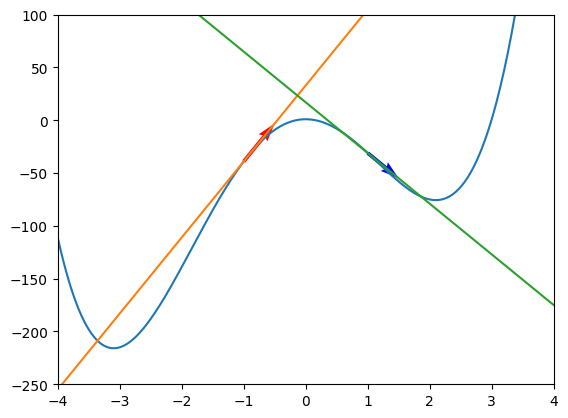

In [4]:
# Here is a plot of the function f(x) along with some tangent lines.

x = np.linspace(-5,5,500)

# Plot of f(x)
plt.plot(x,f(x))
plt.xlim(-4,4)
plt.ylim(-250,100)

# Plot of the tangent to f(x) at x=-1 and corresponding direction vector
plt.plot(x,ttf(x,-1))
plt.quiver(-1,f(-1),1,df(-1),angles='xy',scale_units='xy',scale=2,color='red')

# Plot of the tangent to f(x) at x=1 and corresponding direction vector
plt.plot(x,ttf(x,1))
plt.quiver(1,f(1),1,df(1),angles='xy',scale_units='xy',scale=2,color='blue')

## Finding Minimums
We can use this basic idea to find minimums of a function when it is not possible or practical to solve for the critical values.  

If the derivative, slope, is positive then moving forwatd is going up, so if we want to find the minimum value we need to go backwards.  However, if the derivative, slope, is negative then the function is decreasing and the minimum is ahead of you, and you want to go forwards. So, the direction we move is always opposite in sign to the derivative:
- A ***positive*** derivative means the function is increasing and we need a ***negaive*** change in $x$ to find the minimum.
- A ***negative*** derivative means the function is decreasing and we need a ***positive*** change in $x$ to fine the minimum.

A basic Algorithm for finding the minimum might look something like:

Given a function $f(x)$ and its derivative $f^\prime(x)$:
1. Pick an initial x value $x_0$
2. Let the initial y value be $y_0=f(x_0)$
3. Pick a step size call it $dx$
4. Start a loop that stops after a fixed number of steps or when the output values stop changing significantly
    1. In the loop let $$x_i = x_{i-1} - dx\cdot f^{\prime}(x_{i-1})$$
    2. Then let $y_i=f(x_i)$
    3. If $x_i=x_{i-1}$, the derivative was zero and we need to adjust or $x_i$ a bit, say by $dx$ and try again.
    4. If $y_i\geq y_{i-1}$ we probably went to far, so decrease the step size and iterate again.
    5. If $y_i<y_{i-1}$ we are going in the right direction, maybe risk taking larger steps.

This is a very basic version of the ***Gradient Descent*** algorithm.

In [6]:
# Initial Values
# Learning rate
dx = 10**(-2)

# Initial Guess at the minimum
xVals = [0]
yVals = [f(xVals[-1])]

# The most recent x value.
temp_x = xVals[-1]

# Loop
for i in range(500):
# Most recent y
    temp_y = f(temp_x)
# New x and y using x_{i+1} = x_i-dx*f'(x_i)
    new_x = temp_x-dx*df(temp_x)
    new_y = f(new_x)
# Iteration step
    if new_x==temp_x: 
        temp_x += dx
    elif new_y<temp_y:
        temp_x = new_x
        dx = 1.01*dx
        xVals.append(new_x)
        yVals.append(new_y)
    else:
        dx = 0.9*dx

## Visualizing the Results
Below we can see the results of ploting the $x$ and $y$ coordinates we found at each step.  If you go back and try changing the initial values in the above loop you will see that if/or how fast we find the minimum varies greatly.  They also effect which minimum we find.

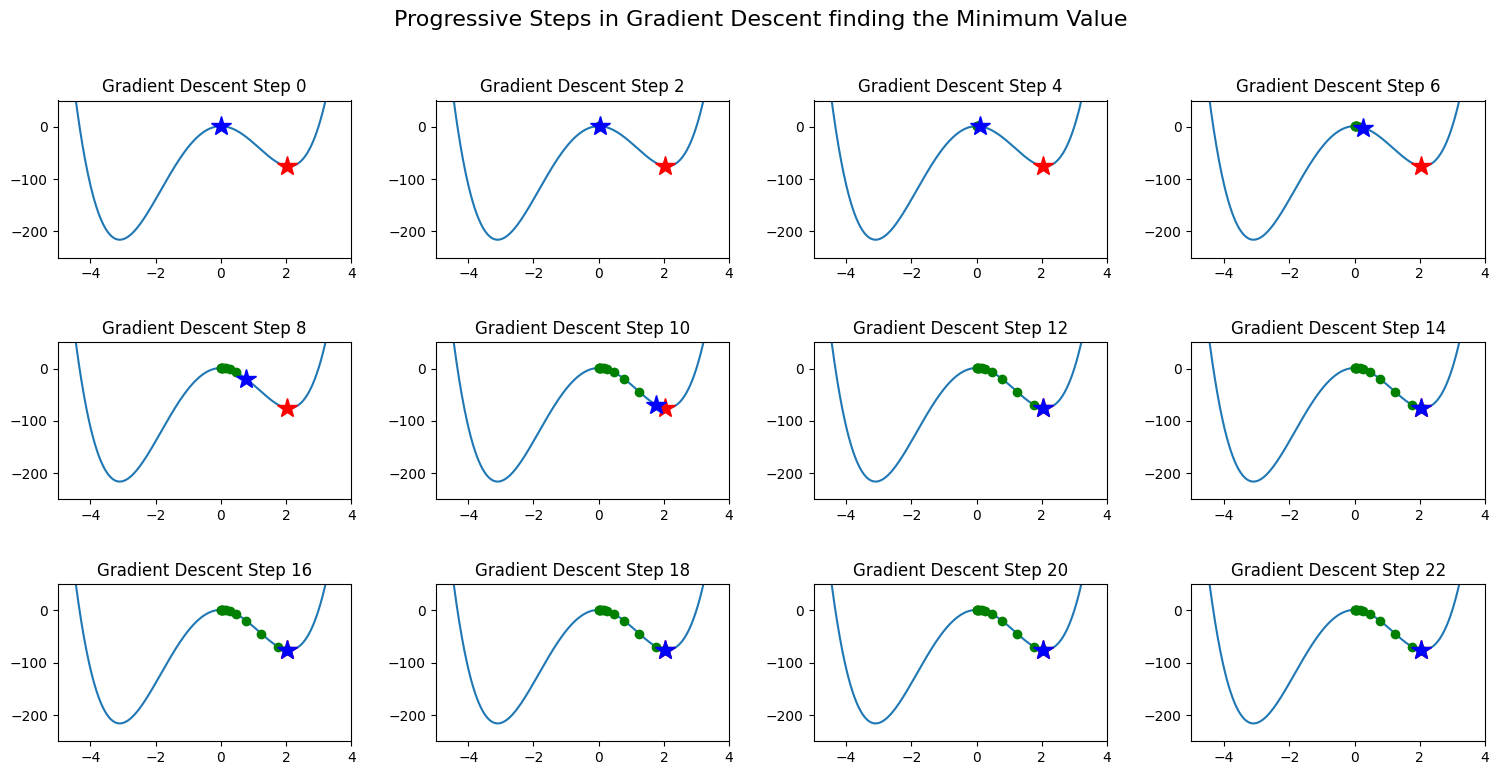

In [19]:

# Set parameters for the graphing windows
x_min = -5
x_max = 4
y_min = -250
y_max = 50

# Parameters for the loop to create the graphs
final = len(xVals)-1
step = max(1,final/6)
index = 0
current = 0

# Create plot object with 12 smaller plots
GD_fig, GD_ax = plt.subplots(ncols=4, nrows=3,figsize=(15,7))
GD_fig.tight_layout(h_pad=4, w_pad=3)
GD_fig.suptitle("Progressive Steps in Gradient Descent finding the Minimum Value",fontsize=16,y=1.1)

# Fill the plots
for row in range(3):
    for col in range(4):
        GD_ax[row,col].plot(x,f(x))
        GD_ax[row,col].plot(xVals[final],yVals[final],"r*",markersize=15)
        GD_ax[row,col].plot(xVals[:index],yVals[:index],"go")
        GD_ax[row,col].plot(xVals[current],yVals[current],"b*",markersize=15)
        GD_ax[row,col].set_xlim(x_min,x_max)
        GD_ax[row,col].set_ylim(y_min,y_max)
        GD_ax[row,col].set_title("Gradient Descent Step %s"%index);
        index = int(index+step)
        current = min(index,final)


### Questions:
1. Go back up and try changing the value of `dx` to see which values can lead to the each of the different minimums and whcih don't work at all.
2. What happens if you try changing the initial $x$ value by changing the `x=[0]`?
3. Try starting with a random initial seed for x by using `np.random.rand()` which returns a random number between 0 and 1 (write an expression to get a random number from -4 to 4)

## Fitting Data with Gradient Descent
Our goal in fitting a curve, $y=f(x)$, to a set of data is to minimize a sum such as $$C=\frac{1}{n}\sum_{i=1}^n (f(x_i)-y_i)^2,$$ i.e. we are minimizing the sum of the squares or the mean sum of squares in this case.  We will use gradient desecent to minimize $C$; this requires extensive use of the chain rule.

### Entering Data and Using SciPy

We start by using Pandas to read in the data we want to analize and look at how to use SciPy to fit curves to the data.

In [51]:
# Here we import the data and assign each column of values to a variable:
# Notice that as columsn are assigned they are made Numpy arrays
df = pd.read_csv('../data/alcohol_calories.csv')
t = np.array(df['Alcohol'])
oz = np.array(df['oz'])
cal = np.array(df['calories'])

# This calculation creates a Numpy array of calories per oz
cal_per_ounce = cal/oz

# This sorts the data and assigns it to the variables x and y
indicies = np.argsort(oz)
X = oz[indicies]
Y = cal_per_ounce[indicies]

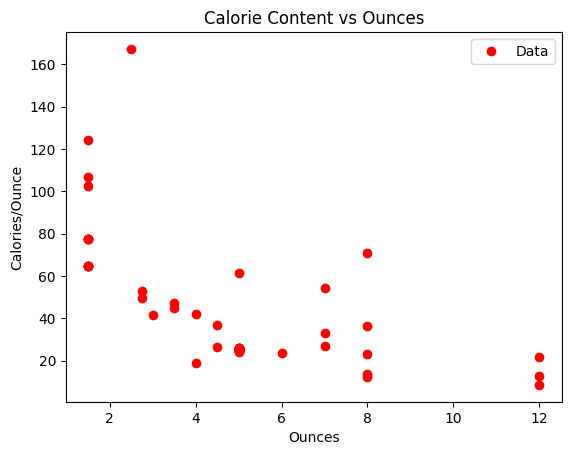

In [171]:
fig,ax = plt.subplots();
scatt_plot, = ax.plot(X,Y,"ro",label="Data");
ax.set_title("Calorie Content vs Ounces");
ax.set_xlabel('Ounces');
ax.set_ylabel('Calories/Ounce');
ax.legend();

In [172]:
# These create function representing arbitray linear and quadratic functions
def arb_linear(x,a,b): return a*x+b
def arb_quad(x,a,b,c): return a*(x-b)**2+c

In [173]:
lcoef,lcovar = curve_fit(arb_linear, X, Y)
qcoef,qcovar = curve_fit(arb_quad, X, Y)

In [174]:
x=np.linspace(0,15,30)
line_approx, = ax.plot(x,lcoef[0]*x+lcoef[1],label="Linear Approx.");
quad_approx, = ax.plot(x,arb_quad(x,qcoef[0],qcoef[1],qcoef[2]),label="Quadratic Approx.")

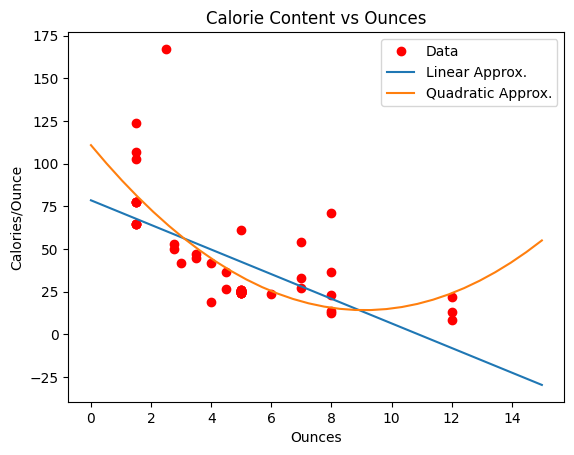

In [175]:
ax.legend()
fig

### Fitting a Linear Function

Suppose that we want to find parameters $a$ and $b$ for the expression $f(x)=ax+b$ so that we minimize the function:
$$C=\frac{1}{n} \sum (f(X)-Y)^2$$
for data sets $X$ and $Y$.  We can do this using gradient descent with the derivatives of $C$ with respect to each parameter:
$$
\begin{align}
    \frac{dC}{da} &= \frac{1}{n} \sum 2(aX+b-Y)(X)\\
    \frac{dC}{db} &= \frac{1}{n} \sum 2(aX+b-Y)(1)
\end{align}
$$

In [56]:
# Function to find the average square deviation
def C(x,y,a,b):
    yp = arb_linear(x,a,b)
    dy = yp-y
    return np.mean(dy**2)

# Derivative of the average deviation with respect to a, dC/da
def Ca(x,y,a,b):
    # Predicted y values
    yp = arb_linear(x,a,b)
    # Error in the y values
    dy = yp-y
    return np.mean(2*dy*(x))

# Derivative of the average deviation with respect to b, dC/db
def Cb(x,y,a,b):
    # Predicted y values
    yp = arb_linear(x,a,b)
    # Error in the y values
    dy = yp-y
    return np.mean(2*dy*1)

In [57]:
# Set reasonable starting values
a = [(Y[0]-Y[-1])/(X[0]-X[-1])]
b = [Y[0]]

# Set initial learning rate
dt = 0.01

# Iterate through steps in Gradient Descent
for i in range(500):
    new_a = a[-1]-dt*Ca(X,Y,a[-1],b[-1])
    new_b = b[-1]-dt*Cb(X,Y,a[-1],b[-1])
    current_C = C(X,Y,a[-1],b[-1])
    updated_C = C(X,Y,new_a,new_b)
    if updated_C < current_C:
        a.append(new_a)
        b.append(new_b)
        dt = 1.01*dt
    else:
        dt = 0.9*dt

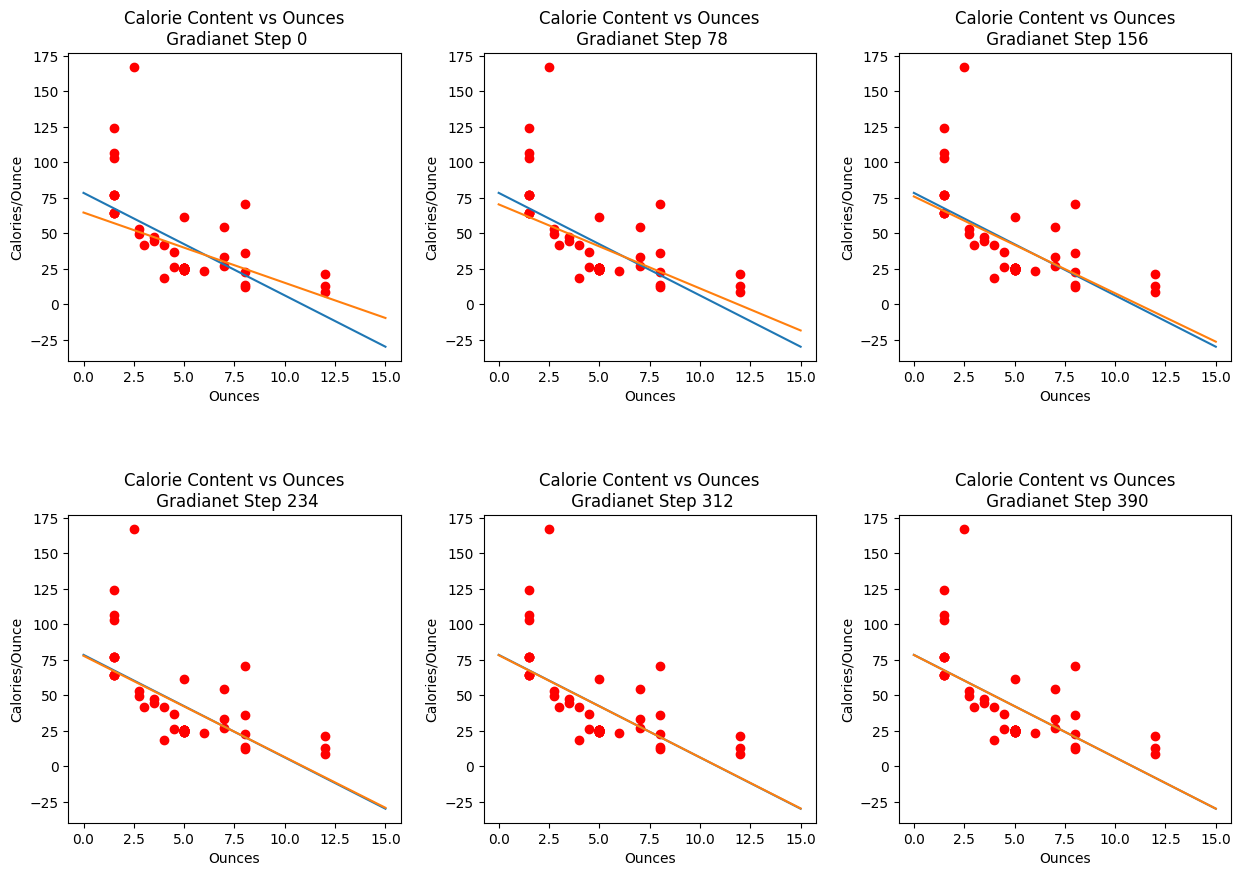

In [58]:
n = 0
step_size = len(a)//6

fig2,ax2 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig2.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        ax2[row,col].plot(oz,cal_per_ounce,"ro");
        ax2[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax2[row,col].set_xlabel('Ounces');
        ax2[row,col].set_ylabel('Calories/Ounce');
        ax2[row,col].plot(x,lcoef[0]*x+lcoef[1]);
        ax2[row,col].plot(x,a[n]*x+b[n]);
        n += step_size

We can see that after about 300 to 400 steps using gradient descent there is little to no difference between our values and the values obtained using SciPy.

## Fitting a Quadratic Function

Suppose that we want to find parameters $a$, $b$ and $c$ for the expression $f(x)=a(x-b)^2+c$ so that we minimize the function:
$$C=\frac{1}{n} \sum (f(X)-Y)^2$$
for data sets $X$ and $Y$.  We can do this using gradient descent with the derivatives of $C$ with respect to each parameter.  To simplify this process we first split $f(x)$ into three layers 
1. $z_0=x-b$,
2. $z_1=a\, z_0^2$, and
3. $z_2=z_1+c$,

so that $$C=\frac{1}{n} \sum (z_2-Y)^2.$$

Then using the ***chain rule*** 
$$
\begin{align}
    \frac{dC}{dc}&=\frac{dC}{dz_2}\frac{dz_2}{dc}\\
    \frac{dC}{da}&=\frac{dC}{dz_2}\frac{dz_2}{da}=\frac{dC}{dz_2}\frac{dz_2}{dz_1}\frac{dz_1}{da}\\
    \frac{dC}{db}&=\frac{dC}{dz_2}\frac{dz_2}{db}=\frac{dC}{dz_2}\frac{dz_2}{dz_1}\frac{dz_1}{db}=\frac{dC}{dz_2}\frac{dz_2}{dz_1}\frac{dz_1}{dz_0}\frac{dz_0}{db}
\end{align}
$$

We can use these to build functions that allow us to apply gradient descent.


In [37]:
# Note on layers:
# z0 = X-b
# z1 = a*z0^2
# z2 = z1+c

# The cost function C
# C = mean of (z2-Y)^2
def C(x,y,a,b,c):
    # Predicted y values
    yp = arb_quad(x,a,b,c)
    # Error in the y values
    dy = yp-y
    return np.mean(dy**2)

# Return dC/dc = (dC/dz2)(dz2/dc) = (2(z2-Y))(1)
def Cc(x,y,a,b,c):
    # Predicted y values
    yp = arb_quad(x,a,b,c)
    # Error in the y values
    dy = yp-y
    return np.mean(2*dy*(1))

# Return dC/da = (dC/dz2)(dz2/da) = (dC/dz2)(dz2/dz1)(dz1/da) = (2(z2-Y))(1)(z0^2)
def Ca(x,y,a,b,c):
    # Predicted y values
    yp = arb_quad(x,a,b,c)
    # Error in the y values
    dy = yp-y
    z0 = x-b
    return np.mean(2*dy*(1)*(z0**2))

# Return 
# dC/db = (dC/dz2)(dz2/db) = (dC/dz2)(dz2/dz1)(dz1/db) = (dC/dz2)(dz2/dz1)(dz1/dz0)(dz0/db) = (2(z2-Y))(1)(2*a*z0)(-1)
def Cb(x,y,a,b,c):
    # Predicted y values
    yp = arb_quad(x,a,b,c)
    # Error in the y values
    dy = yp-y
    z0 = x-b
    return np.mean(2*dy*(1)*(2*a*z0*-1))



In [38]:
# Pick the initial a, b, and c coefficients so that they
# give a parabola roughly fitting the data.
# (b,c) are chosen to but the vertex at the mean x and y values
# a is chosen so that the parabola goes through the first point (x,y)
b = [np.mean(X)]
c = [np.min(Y)]
a = [(Y[0]-c[-1])/(X[0]-b[-1])**2]

dt = 10**(-2)

for i in range(20000):
# Calculate the change
    da_temp = dt*Ca(X,Y,a[-1],b[-1],c[-1])
    db_temp = dt*Cb(X,Y,a[-1],b[-1],c[-1])
    dc_temp = dt*Cc(X,Y,a[-1],b[-1],c[-1])
# Calculate the new parameters
    temp_a = a[-1]-da_temp
    temp_b = b[-1]-db_temp
    temp_c = c[-1]-dc_temp
# Check for improvement
    current_C = C(X,Y,a[-1],b[-1],c[-1])
    next_C = C(X,Y,temp_a,temp_b,temp_c)
    if next_C < current_C:
        a.append(temp_a)
        b.append(temp_b)
        c.append(temp_c)
        dt = dt*1.01
    else:
        dt = dt*0.9

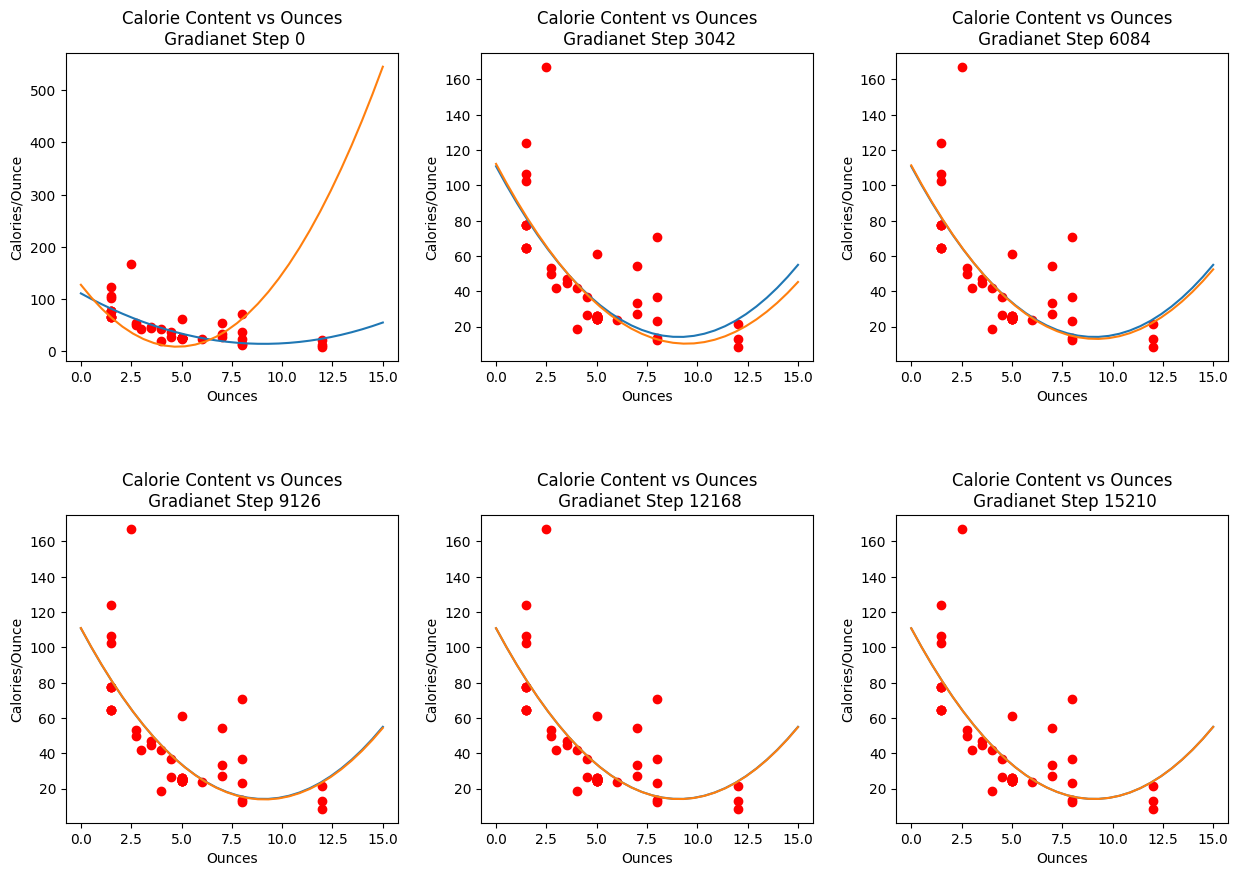

In [39]:
x=np.linspace(0,15,30)
n = 0
step = (len(a)-1)//6


fig3,ax3 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig3.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        ax3[row,col].plot(oz,cal_per_ounce,"ro");
        ax3[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax3[row,col].set_xlabel('Ounces');
        ax3[row,col].set_ylabel('Calories/Ounce');
        ax3[row,col].plot(x,arb_quad(x,qcoef[0],qcoef[1],qcoef[2]));
        ax3[row,col].plot(x,arb_quad(x,a[n],b[n],c[n]));
        n += step

In the graphs above we can see that after about 10,000 to 15000 iterations we see little to no differennce between the values given by SciPy and those we found with gradient descent.

## Fitting an Exponential Function

- First use SciPy to add exponential approximations of the form $f(x)=be^{ax}$ and $g(x)=c+be^{ax}$.
- After that you will use Gradient descent to try and find the same coefficients

In [168]:
# Set Up Arbitrary Exponential Functions
def arb_exp_without_constant(x,a,b): return b*np.exp(a*x)
def arb_exp_with_constant(x,a,b,c): return c+b*np.exp(a*x)

# Let SciPy find the coefficients
ecoefnc,ecovarnc = curve_fit(arb_exp_without_constant, X, Y)
ecoefc,ecovarc = curve_fit(arb_exp_with_constant, X, Y,[-1,1,0]) # The [-1,1,0] gives SciPy our initial guess at the values of the parameters.

C:\Users\roccac.W-WCSU-LOCAL\AppData\Local\Temp\ipykernel_24120\3273126120.py:3: RuntimeWarning: overflow encountered in exp
  def arb_exp_with_constant(x,a,b,c): return c+b*np.exp(a*x)


In [176]:
exp_approxnc, = ax.plot(X,arb_exp_without_constant(X,ecoefnc[0],ecoefnc[1]),label="Exponential Approx. w/o a Constant")
exp_approxc, = ax.plot(X,arb_exp_with_constant(X,ecoefc[0],ecoefc[1],ecoefc[2]),label="Exponential Approx. w/ a Constant")

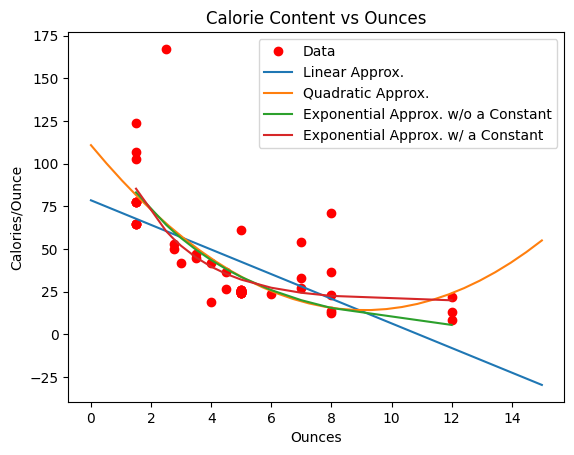

In [177]:
ax.legend()
fig

### Using Gradient Descent Version 1

First try abd fit a curve to $$f(x)=be^{ax}$$ using gradient descent.  Rememeber that you are trying to minimize 
$$C=\frac{1}{n}\sum (f(X)=Y)^2.$$
So, you will need to write functions for $C$, $\frac{dC}{db}$ and $\frac{dC}{da}$.  You should use the layers $z_0=aX$ and $z_1=be^{z_0}$.

In [215]:
# Fill in the missing portions of the functions below.

# z0 = aX
# z1 = b*e^z0

# The cost function C
# C = mean of (z1-Y)^2
def C(x,y,a,b):
    # Predicted y values using the appropriate arbitrary function above
    yp = arb_exp_without_constant(x,a,b)
    # Error in the y values
    dy = yp-y
    return np.mean(dy**2)

# dC/db = ...
def Cb(x,y,a,b):
    # Predicted y values using the appropriate arbitrary function above
    yp = arb_exp_without_constant(x,a,b)
    # Error in the y values
    dy = yp-y
    z0 = a*x
    return np.mean(2*dy*np.exp(z0))

# dC/da = ...
    # Predicted y values using the appropriate arbitrary function above
    yp = arb_exp_without_constant(x,a,b)
    # Error in the y values
    dy = yp-y
    z0 = a*x
    z1 = ...
    return np.mean(2*dy*np.exp(z0))

# dC/da = dC/dz1 * dz1/da
def Ca(x,y,a,b):
    # Predicted y values using the appropriate arbitrary function above
    yp = arb_exp_without_constant(x,a,b)
    # Error in the y values
    dy = yp-y
    # z0 = aX
    z0 = a*x
    # z1 = b*e^{z0}
    z1 = b*np.exp(z0)
    # dC/da = mean(2*(z1-Y) * (b*e^{z0} * X)) = mean(2*dy*z1*x)
    return np.mean(2*dy*z1*x)


In [211]:
'''
    These are resasonable if not optimal values to start with since they give an 
    exponential curve going through the first and last points in your data set.
'''
temp_a = np.log(Y[-1]/Y[0])/(X[-1]-X[0])
temp_b = Y[0]/np.exp(temp_a*X[0])

a = [temp_a]
b = [temp_b]

dt = 10**(-2)


'''
    I have set the number of iterations high because the values do not converge very 
    quickley with this algorithm.
'''
for i in range(500000):
# Calculate the change in the values of a and b using the functions you wrote above
    da_temp = Ca(X,Y,a[-1],b[-1])
    db_temp = Cb(X,Y,a[-1],b[-1])
# Calculate the new parameters
    temp_a = a[-1] - dt*da_temp
    temp_b = b[-1] - dt*db_temp
# Check for improvement
    current_C = C(X,Y,a[-1],b[-1])
    next_C = C(X,Y,temp_a,temp_b)
    if next_C < current_C:
        a.append(temp_a)
        b.append(temp_b)
        dt = dt*1.1
    else:
        dt = dt*0.9

Now check to see how close you have gotten to the values found using SciPy.
For a challenge, try and create images like the ones I gave for the linear and quadratic fit.

### Using Gradient Descent Version 2

Now try abd fit a curve to $$f(x)=c+be^{ax}$$ using gradient descent.  Rememeber that you are trying to minimize 
$$C=\frac{1}{n}\sum (f(X)=Y)^2.$$
So, you will need to write functions for $C$, $\frac{dC}{dc}$, $\frac{dC}{db}$ and $\frac{dC}{da}$.  
You should use the layers $z_0=aX$, $z_1=be^{z_0}$ and $z_2=c+z_1$.